In [26]:
# let me look at lea's sample...
import glob
from astropy.io.votable import parse_single_table
import gaia_spectrum as gs
%pylab inline

path = './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/*.xml'
binary_filenames = glob.glob(path)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [39]:
# plotting the recovered binaries
# is there only one
from astropy.io import fits
w_interp_to = fits.open('./data/cannon_training_data/gaia_rvs_wavelength.fits')[0].data[20:-20]

for filename in binary_filenames:
    source_id = int(filename.split(' ')[-1][:-4])

    tbl = parse_single_table(filename)
    flux = tbl.array['flux'].data[20:-20]
    sigma = tbl.array['flux_error'].data[20:-20]
    
    finite_idx = ~np.isnan(flux)
    if np.sum(finite_idx) != len(flux):
        flux = np.interp(w_interp_to, w_interp_to[finite_idx], flux[finite_idx])
    sigma = np.nan_to_num(sigma, nan=1)

    spec = gs.GaiaSpectrum(source_id,flux,sigma)
    spec.compute_binary_detection_stats()
    print(source_id, end=' : ')
    if spec.delta_chisq>200:
        print('binary detected', end='/')
    else:
        print('-----', end='/')
    print(spec.delta_chisq)

4418203587193988480 : -----/56.35348532683588
231113736385994624 : binary detected/1004.5514049023777
2029433521248546304 : -----/82.34793175963978
3712538811193759744 : binary detected/269.9152988907499
3101923001490347392 : -----/81.45711823695547
4367026303085396352 : -----/52.38008612486419
1362295082910131200 : -----/90.95271458527213
798068905726303232 : binary detected/505.6219038145182
6317854874752594048 : -----/198.37815443648287
19316224572460416 : -----/162.59127220552318
746545172372256384 : -----/108.18930733780007
3626268998574790656 : binary detected/255.5258894675269
3057712223051571200 : -----/47.466347121688614
4364527594192166400 : binary detected/228.90994544729529
4377160604838377600 : binary detected/246.55626314602023


In [40]:
# wow this is so exciting!
# let me look through the ones I detected
binary_filenames

['./data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 4418203587193988480.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 231113736385994624.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 2029433521248546304.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 3712538811193759744.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 3101923001490347392.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 4367026303085396352.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 1362295082910131200.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 798068905726303232.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 6317854874752594048.xml',
 './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 19316224572460416.xml',
 './data/liter

231113736385994624 : 

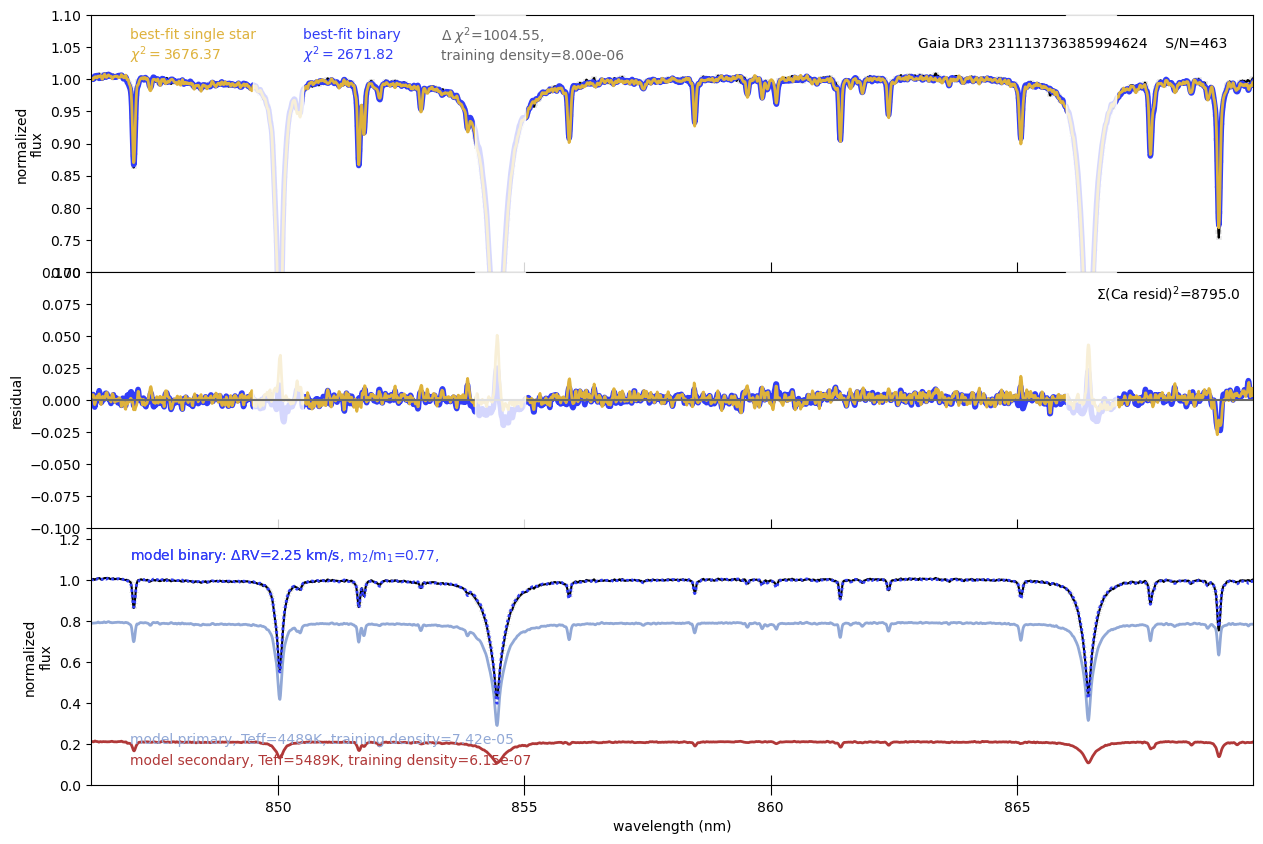

3712538811193759744 : 

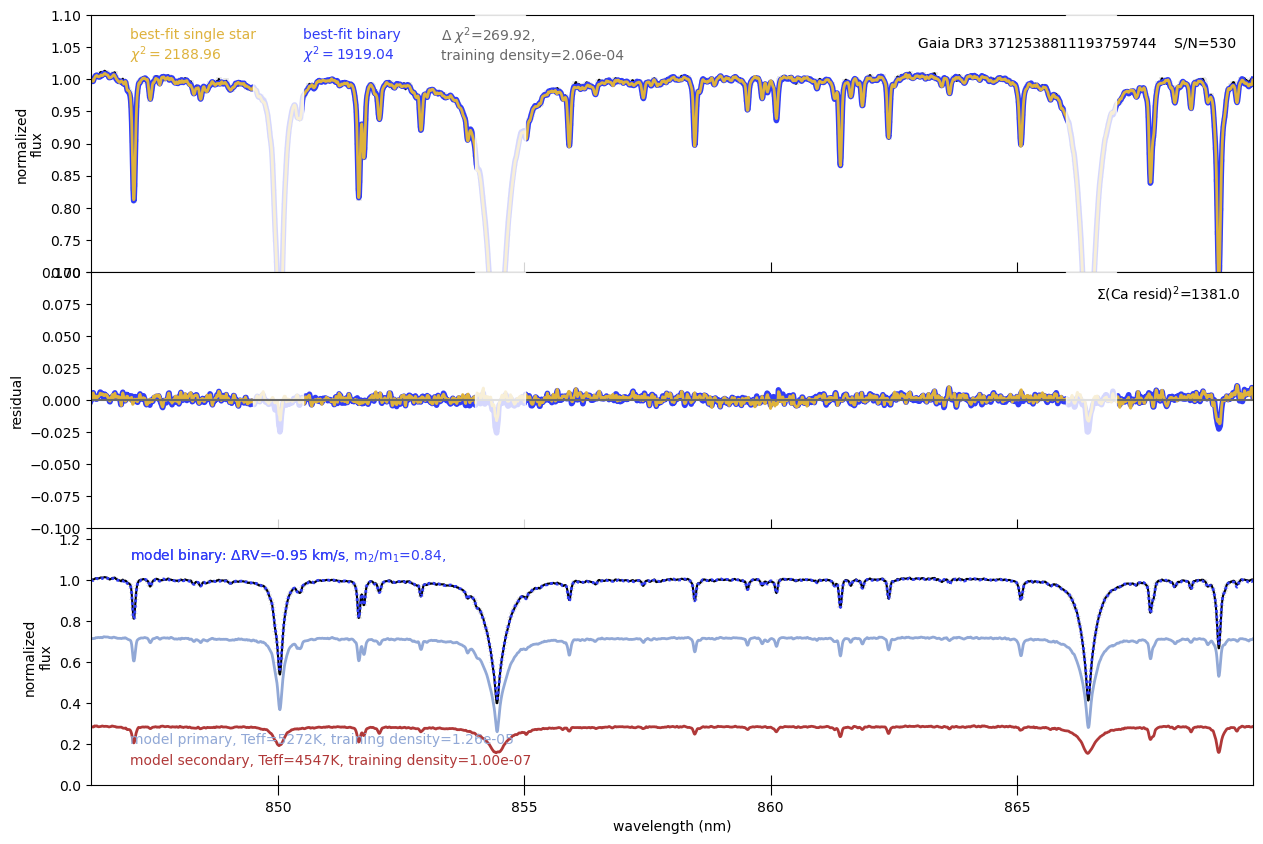

798068905726303232 : 

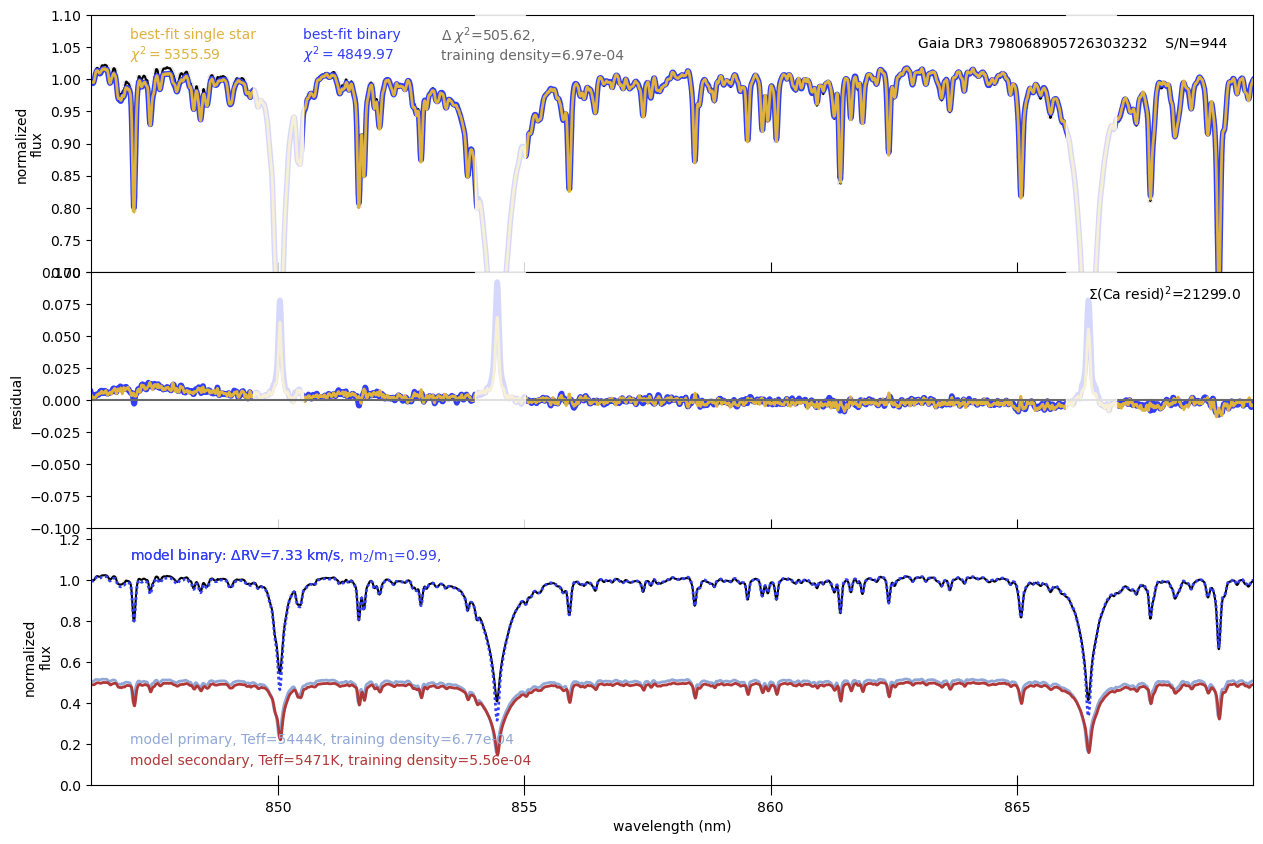

3626268998574790656 : 

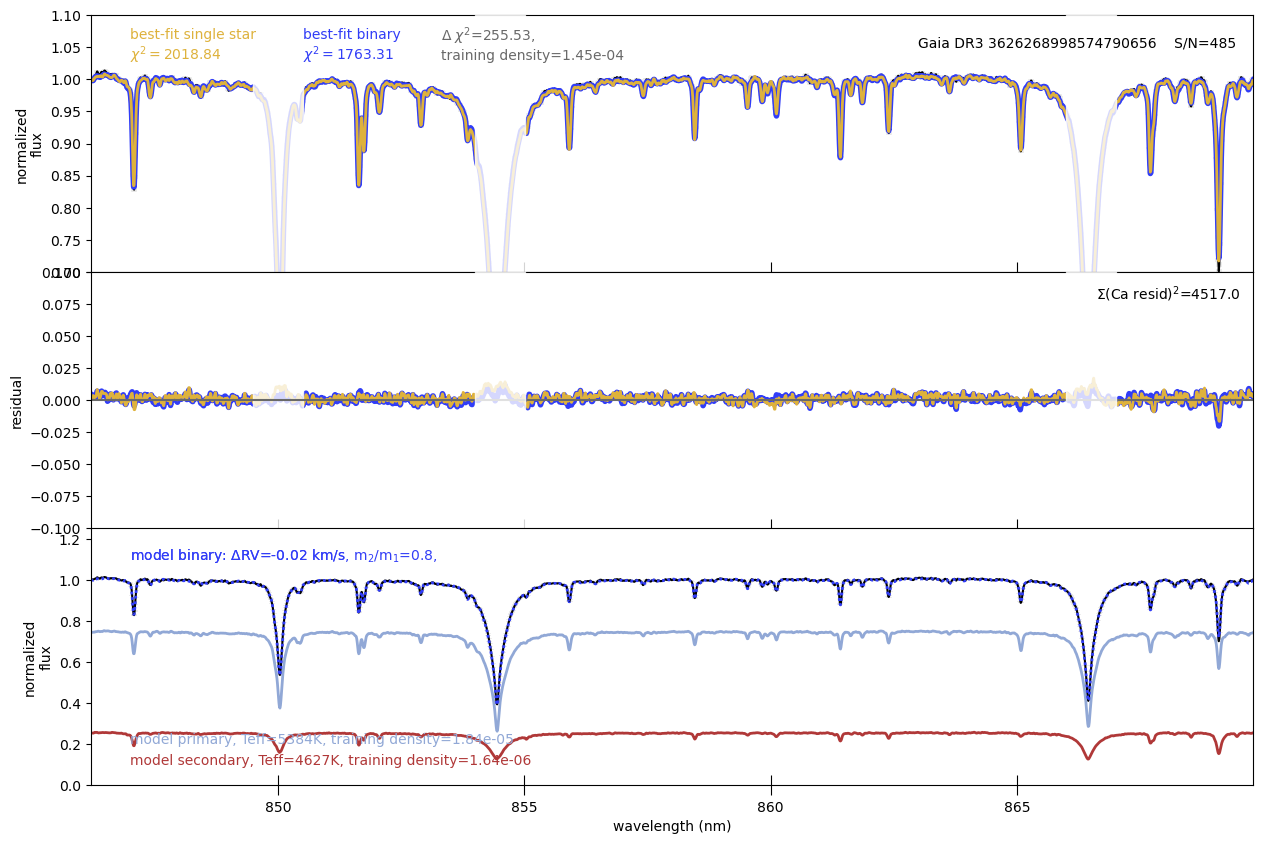

4364527594192166400 : 

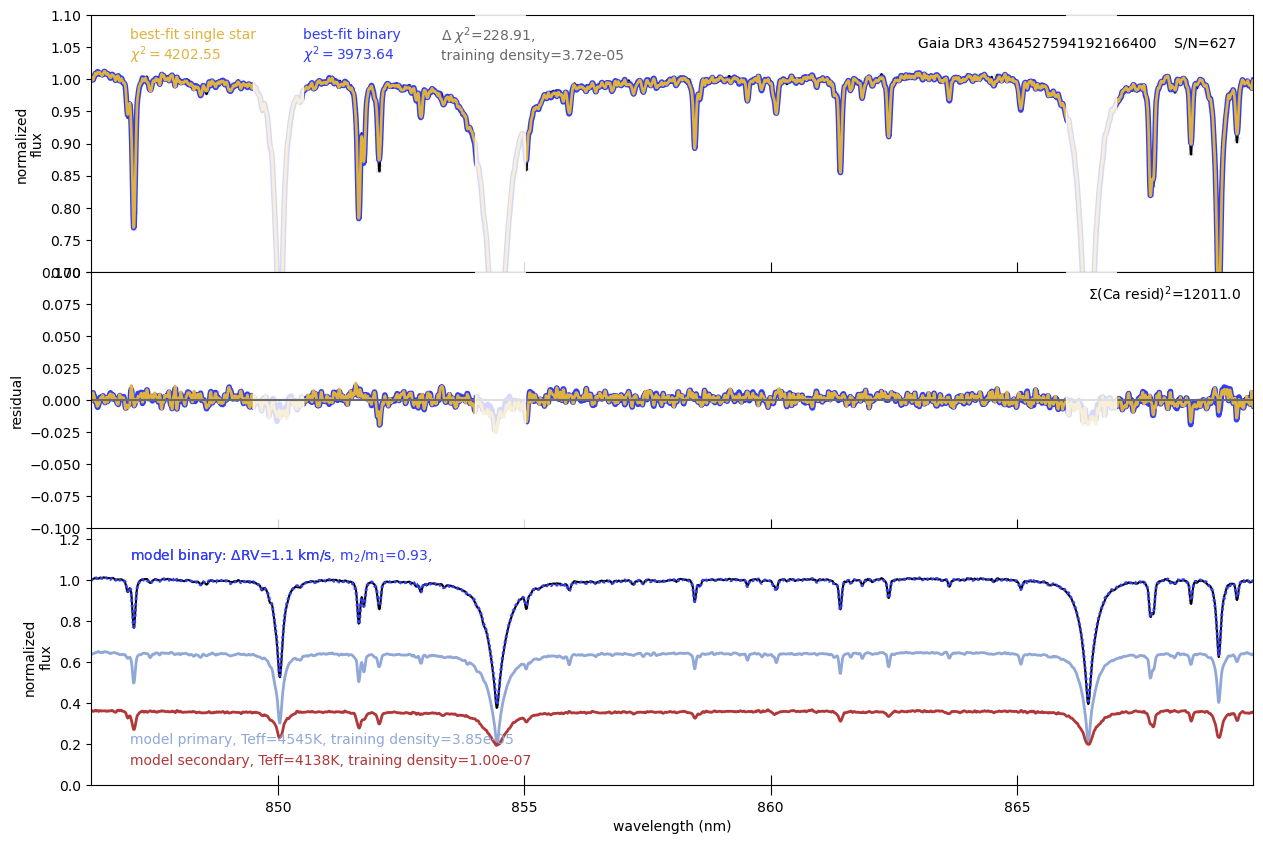

4377160604838377600 : 

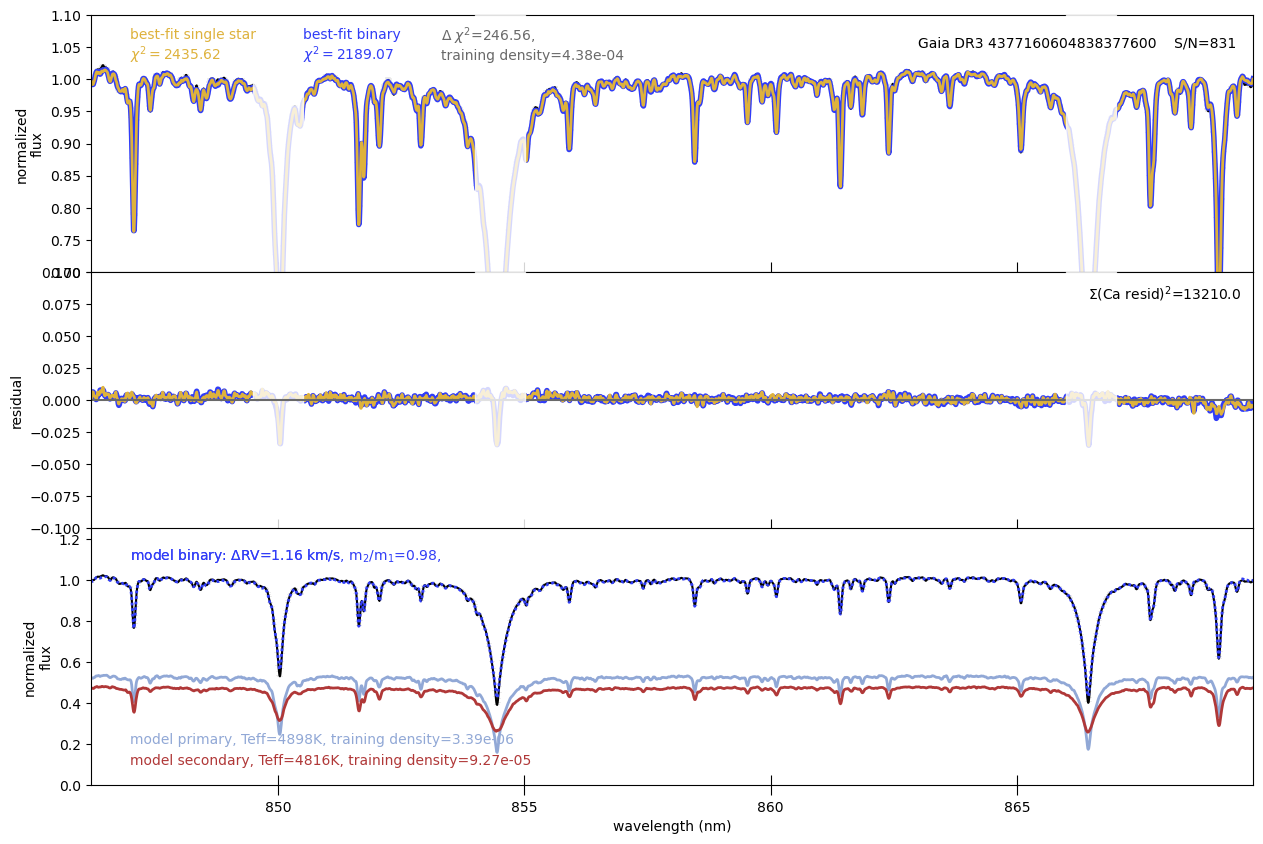

In [42]:
detected_source_ids = [231113736385994624,
                       3712538811193759744,
                       798068905726303232,
                       3626268998574790656,
                       4364527594192166400,
                       4377160604838377600]

path_pref_str = './data/literature_data/Hirsch2021/hirsch_2021_rvs_spectra/RVS-Gaia DR3 '
for source_id in detected_source_ids:
    filename = path_pref_str+str(source_id)+'.xml'
    tbl = parse_single_table(filename)
    
    flux = tbl.array['flux'].data[20:-20]
    sigma = tbl.array['flux_error'].data[20:-20]
    
    finite_idx = ~np.isnan(flux)
    if np.sum(finite_idx) != len(flux):
        flux = np.interp(w_interp_to, w_interp_to[finite_idx], flux[finite_idx])
    sigma = np.nan_to_num(sigma, nan=1)
    
    spec = gs.GaiaSpectrum(source_id,flux,sigma)
    spec.compute_binary_detection_stats()
    print(source_id, end=' : ')
    spec.plot()
    
    
    
# notes

# 231113736385994624 : HD 23439
# this is the one where the binary is too far to detect...
# I guess that's fine since the secondary has a low training density

# 3712538811193759744 : HD 116443
# I don't see this in Lea's paper
# but I guess that's fine because it's a low trianing density

# 798068905726303232 : HD 82885
# I also don't see this in Lea's paper...
# but it has a mass ratio of 1 so that makes sense

# 3626268998574790656 : HD 112758
# Lea's paper says it's a hierarchical triple system,
# and that B was reported in Raghavan but missed by their AO
# I think we might be detecting it!
# what is the mass reported by Raghavan?
# I feel like Lea only found a planet here...
# this is so discouraging
# I can't find a single binary in this dataset???


# 4364527594192166400 : HD 154363
# again nothing in Lea's paper but the training density of the companion is low
# and the mass ratio is high


# 4377160604838377600 : HD 160346
# again nothing in Lea's paper but the mass ratio is high


# maybe my code is just incapable of finding binaries and I need to move on
# I feel like I don't have any good samples
# the APOGEE binaries are too noisy
# and the SPOCS sample hasn't been checked correctly
# and I can't make left or right of Lea's sample
# shouldn't the Raghavan sample be a good one?

19316224572460416 / HIP 12114


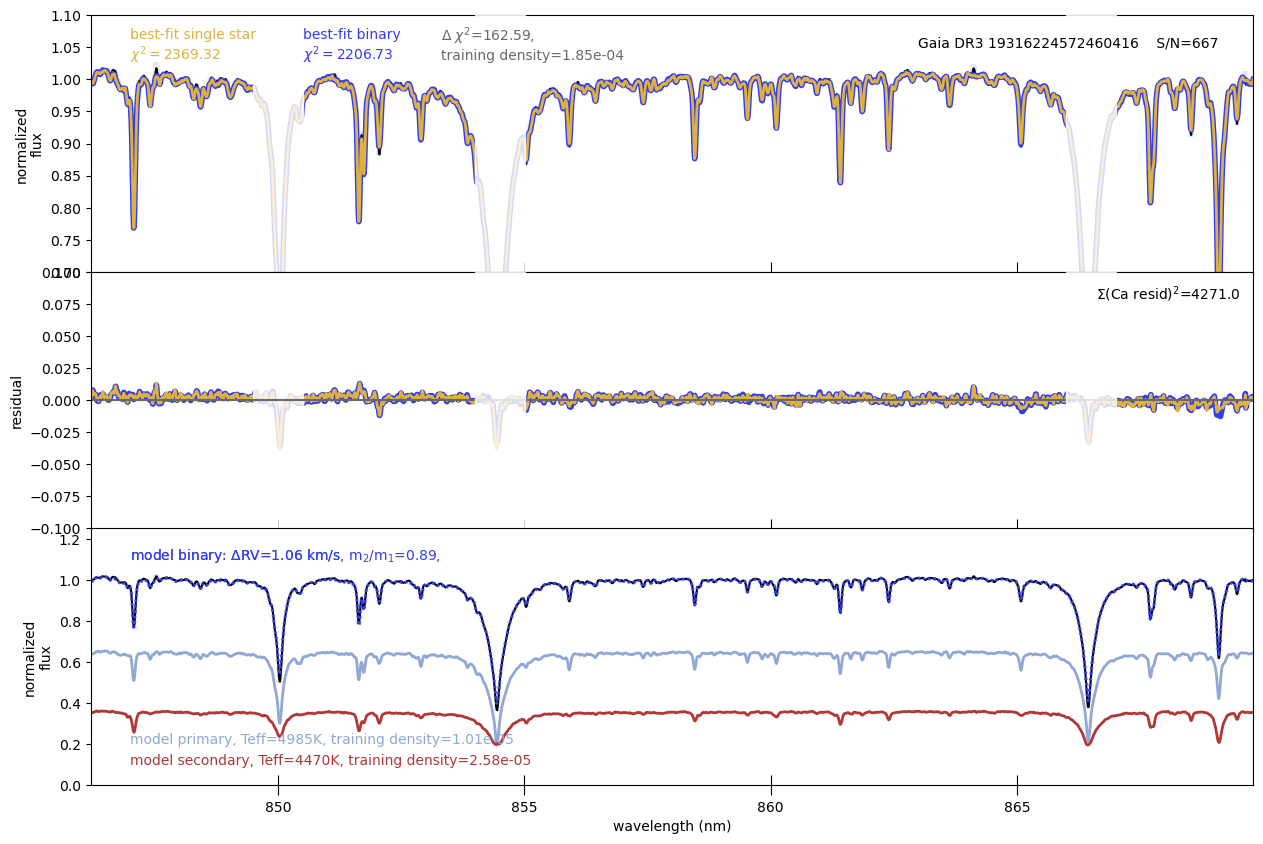

5173902189571919872 / HIP 12444


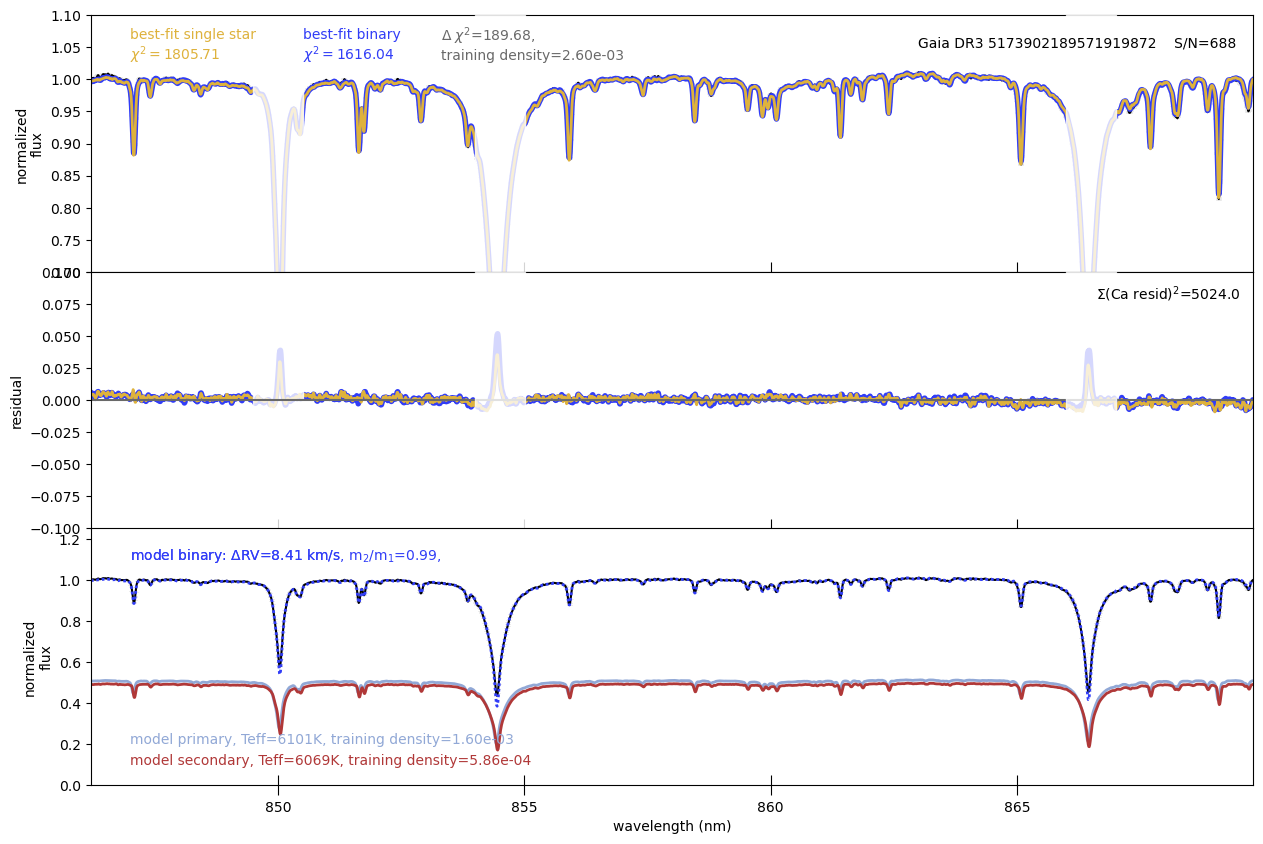

746545172372256384 / HIP 49081


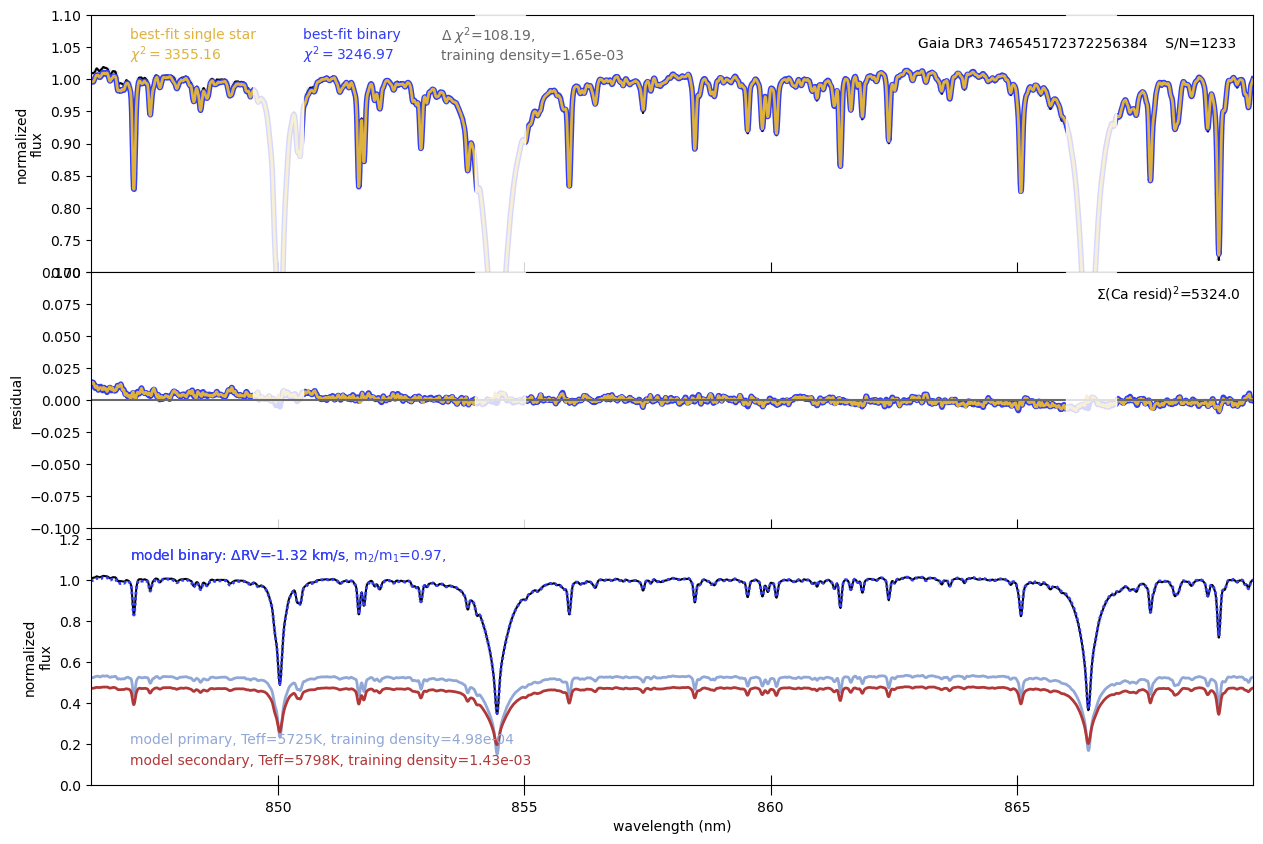

3626268998574790656 / HIP 63366


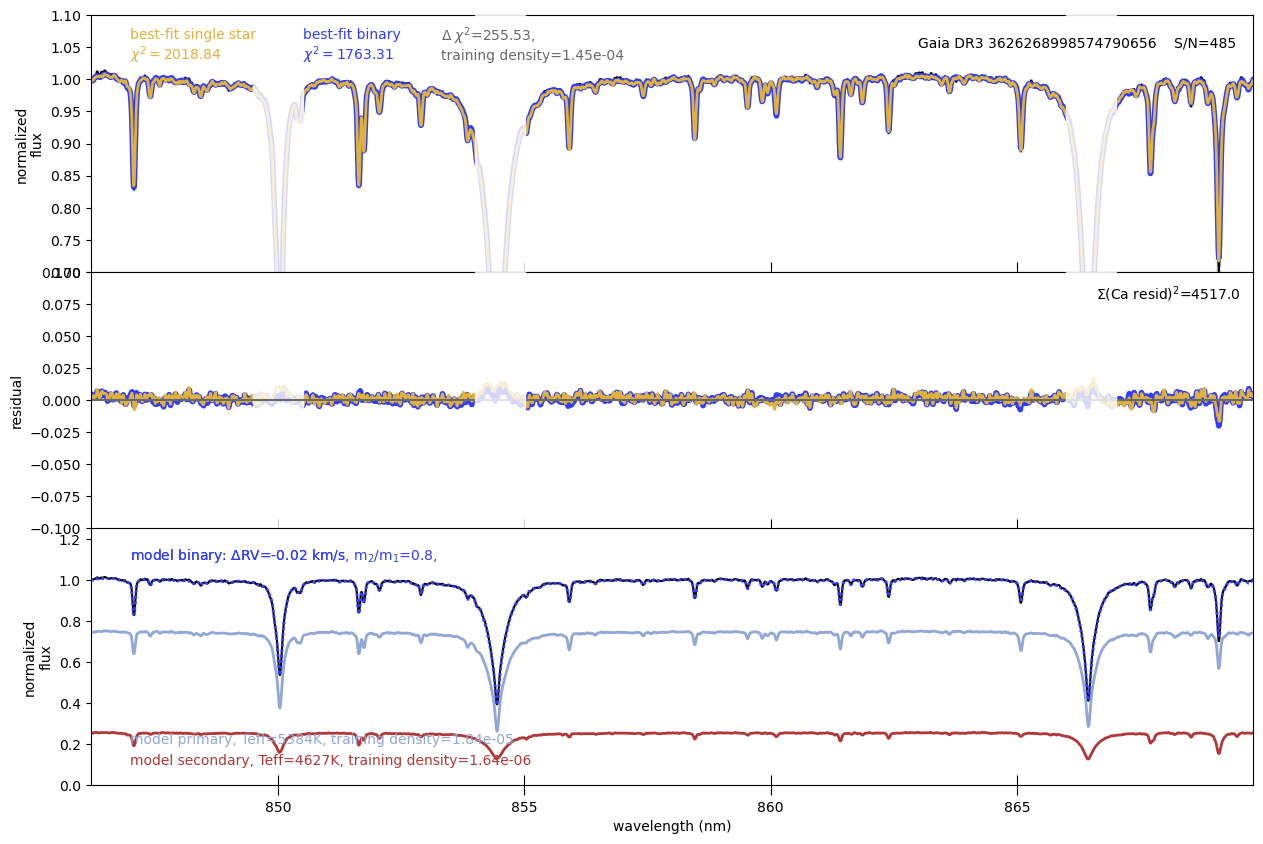

6317854874752594048 / HIP 75718


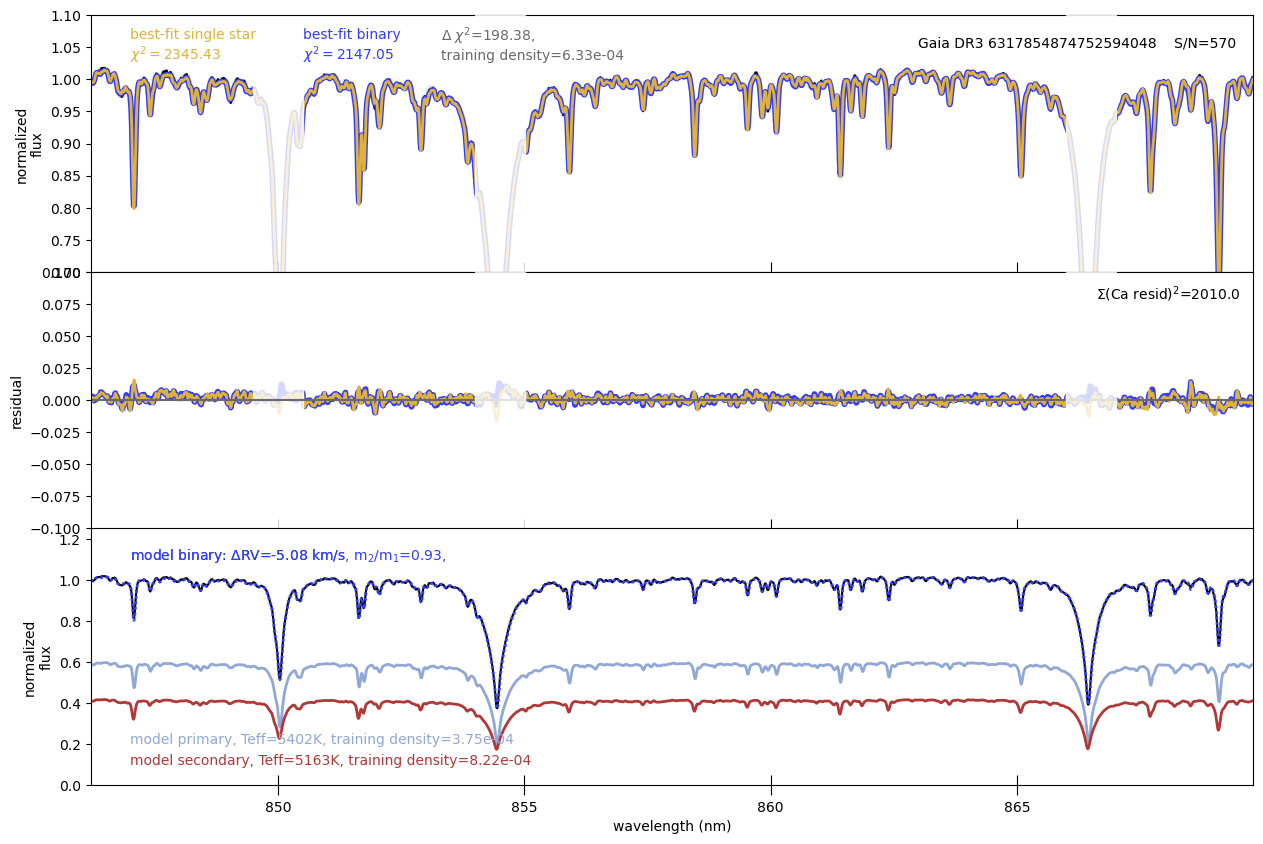

4377160604838377600 / HIP 86400


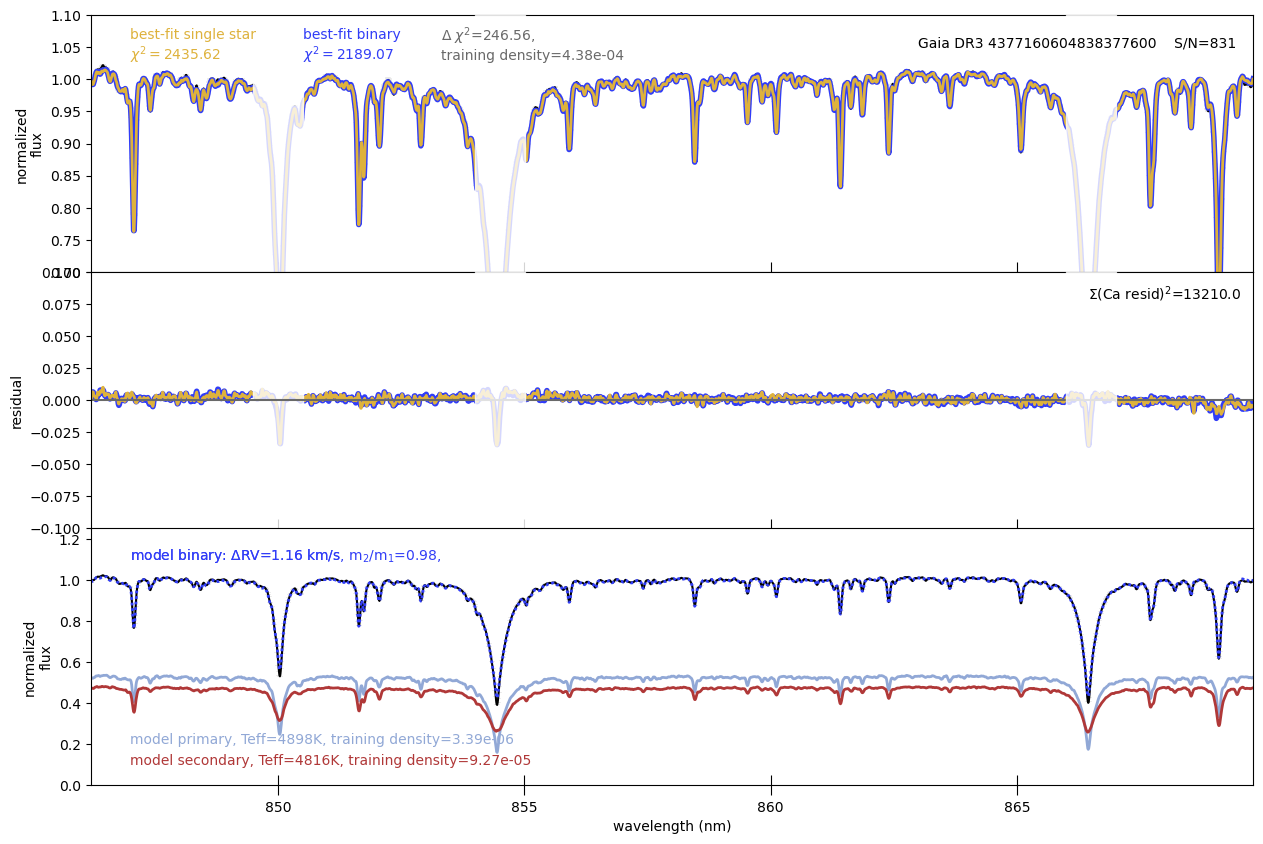

In [67]:
# let me check the Raghavan sample
# I shouldn't detect all of these but I should detect some
# these are being relatively picked up...
# I'm afraid to plot them but here goes 
# then I'll be done for the day
# and not all hope is lost I guess
import pandas as pd
flux_df = pd.read_csv('./data/gaia_rvs_dataframes/raghavan_unresolved_binaries_flux.csv')
sigma_df = pd.read_csv('./data/gaia_rvs_dataframes/raghavan_unresolved_binaries_sigma.csv')
raghavan_sample = pd.read_csv('./data/literature_data/Raghavan2010/Table_17_gaia_IDs.csv')

for source_id in flux_df.columns[1:]:
    flux = flux_df[source_id]
    sigma = sigma_df[source_id]
    spec = gs.GaiaSpectrum(source_id,flux,sigma)
    spec.compute_binary_detection_stats()
    target_id = raghavan_sample[raghavan_sample.source_id==int(source_id)].iloc[0].target_id
    print('{} / {}'.format(source_id, target_id))
    spec.plot()
    

# how can I find these in raghavan to compare them to
# what I've really learned is that El-Badry 2018 is still the best sample of binaries